# IceVision + SAHI: Mask Detection ด้วย YoloV5 แบบง่ายมากๆ

โปรเจ็คนี้ถูกสร้างขึ้นเพื่อเป็นตัวอย่างในการสอนการใช้งาน IceVision-Yolov5 ของค่าย [AI-Builders](https://ai-builders.github.io/)

โดยใช้ชุดข้อมูลจาก kaggle [FaceMask-Detection](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection) โดย Larxel

Notebook นี้ ถูกนำมาปรัปปรุงเพื่อการสอนจาก [IceVision + SAHI](https://github.com/obss/sahi) Notebook.

จัดทำและเรียบเรียงโดย [HRNPH](https://github.com/HRNPH) Ai Builders Gen 2

## ทำการติดตั้ง Icevision + SAHI

ติดตั้ง Library ต่างๆจาก pypi... ใช้ wget เพื่อโหลดไฟล์ Scripts มารัน(pip install ลงเองทีละตัวก็ได้ แต่แบบนี้เร็วกว่า)

In [ ]:
# Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# Choose your installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda11

--2022-07-11 09:36:52--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2766 (2.7K) [text/plain]
Saving to: ‘icevision_install.sh’

icevision_install.s 100%[===================>]   2.70K  --.-KB/s    in 0s      

2022-07-11 09:36:52 (47.7 MB/s) - ‘icevision_install.sh’ saved [2766/2766]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.3 MB/s eta 0:16:52tcmalloc: large alloc 1147494400 bytes == 0x39eb8000 @  0x7f3aeae0b615 0x

### สมมุติว่า Pip install เองทีละอัน
อื้ม! กลับไปใช้ Scripts เถอะ แต่รู้เอาไว้ไม่เสียหายนะครับ

In [ ]:
# Comments ไว้จะได้ไม่ต้องลงทับกัน
# !pip install torch==1.10.0+cu102 torchvision==0.11.1+cu102 -f https://download.pytorch.org/whl/torch_stable.html --upgrade -q
# !pip install mmcv-full==1.3.17 -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.10.0/index.html --upgrade -q
# !pip install torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html --upgrade
# !pip install mmcv-full==1.3.17 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html --upgrade -q  
# !pip install torch=="1.10.0+cpu" torchvision=="0.11.1+cpu" -f https://download.pytorch.org/whl/torch_stable.html  
# !pip install mmcv-full=="1.3.17" -f https://download.openmmlab.com/mmcv/dist/cpu/torch1.10.0/index.html --upgrade -q
# !pip install mmdet==2.17.0 --upgrade -q
# !pip install mmsegmentation==0.20.2 --upgrade -q
# !pip install git+https://github.com/airctic/icevision.git#egg=icevision[all] --upgrade -q
# !pip install git+https://github.com/airctic/icedata.git --upgrade -q
# !pip install icevision[all] --upgrade -q
# !pip install icedata --upgrade -q
# !pip install opencv-python-headless==4.1.2.30

### ติดตั้ง SAHI ด้วย Package Installer for Python ซึ่งก็คือ (pip)

In [ ]:
!pip install sahi -q # ที่ใส่ -q(quite) เพื่อไม่ให้แสดง logs จะได้ไม่รกจอเฉยๆ (อยากรู้ว่ารกยังไงลองลบออกได้)

In [ ]:
# # ถ้าด้านล่าง ใช้ไม่ได้ รัน Cell นี้ (เอาคอมเม้นออก บรรทัด 3-4 ก่อน) แล้วรันใหม่จากด้านบน แล้วไม่ต้องรัน Cell นี้ซ้ำ
# # ทำไปเพื่อ Reset kernel(ระบบ) ของตัวเครื่องเพื่อให้โหลดใหม่ เพราะบางครั้ง มันจะหา IceVision ไม่เจอ
# import IPython
# IPython.Application.instance().kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}

### Imports Library หลักๆที่ต้องใช้ (IceVision)

In [ ]:
from icevision.all import * # import * คือ เอาตัวแปรทั้งหมดใน icevision.all มาเลย (ปกติจะไม่ทำกัน เพราะเดี๋ยวชื่อตัวแปรจะทับกัน แต่ IceVision ออกแบบมาให้ทำได้)

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:18


### โหลด Datasets Mask Detection (อันนี้เก็บไว้ใน google drive) ด้วย Gdown

NOTE: สามารถเปลี่ยนเป็นชุดข้อมูลตัวเองได้

In [ ]:
dest_dir = "/content/data/" # โฟล์เดอร์ที่จะแตกไฟล์ไป อย่าเปลี่ยนถ้ายังไม่รู้ว่าตรงไหนใช้ทำอะไร

In [ ]:
!pip install gdown -q # ติดตั้ง Gdown เอาไว้โหลดไฟล์จาก Google Drive เฉยๆ
!cd '/content/' && mkdir 'data' && mkdir 'test' # cd เข้าไปใน Folder "/content"(cd = ChangeDirectory) แล้ว(&&) สร้างโฟล์เดอร์(mkdir = 'make directory') "data" และ test
!gdown "https://drive.google.com/u/1/uc?id=189OTIOsi-c1KRmEe81VLPJRKf8q7Ccl7&export=download" # โหลดไฟล์ Zip จากลิ้งค์ ด้วย Gdown --ตรงนี้เปลี่ยนเป็นลิ้งตัวเองได้ ถ้าข้อมูลแบ่งไว้เหมือนกัน--
!unzip "/content/maskdetection" -d "/content/data/" # แตกไฟล์ zip ไปที่ -d(directory) "/content/data/" ลองกดเปิดไฟล์ด้านซ้ายมาดูได้

### เตรียมข้อมูลสำหรับการ Fine Tune โมเดล

In [ ]:
parser = parsers.VOCBBoxParser(annotations_dir= f'{dest_dir}/annotations', images_dir=f'{dest_dir}/images') # parsers เป็นตัวแปรที่มาจาก icevision.all
train_records, valid_records = parser.parse() # parsers ใช้ตั้งระบุ Folder ที่เก็บรูป('/images') กับข้อมูล Bounding box('/annotations') -> จากนั้นแบ่งเป็น Train กับ Valid เอาไว้ใช้เทรนโมเดล

  0%|          | 0/853 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/853 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: maksssksksss110) - Clipping bbox xmax from 401 to image width 400 (Before: <BBox (xmin:381, ymin:14, xmax:401, ymax:34)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: maksssksksss231) - Clipping bbox xmax from 401 to image width 400 (Before: <BBox (xmin:392, ymin:86, xmax:401, ymax:106)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: maksssksksss251) - Clipping bbox xmax from 401 to image width 400 (Before: <BBox (xmin:373, ymin:76, xmax:401, ymax:114)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: maksssksksss457) - Clipping bbox xmax from 401 to image width 400 (Before: <BBox (xmin:389, ymin:56, xmax:401, ymax:83)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: maksssksksss5) - Clipping bbox xmax from 401 to image width 400 (Before: <BBox (xmin:364, ymin:30, xmax:401, ymax:66)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SU

# การ Normalize ข้อมูล


*   Resize ภาพไปเป็นสี่เหลี่ยมจตุรัส ขนาด image_size = 384



In [ ]:
image_size = 384 # กรณีใช้ int ภาพจะ Resize แบบไม่บีบภาพ(Maintain Aspect Ratio) ถ้าใช้ (size, size) ที่เป็น Tuple ภาพจะ Resize แบบไม่สน Aspect Ratio(บีบภาพเป็นสี่เหลี่ยม)
# image size = (384, 384) # <--- ตัวอย่าง
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()]) # Resize Validation Datasets 
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=image_size), tfms.A.Normalize()]) # Resize Validation Datasets 

train_ds = Dataset(train_records, train_tfms) # ทำชุด Train
valid_ds = Dataset(valid_records, valid_tfms) # ทำชุด Validation

### Choosing model

In [ ]:
# เลือกโมเดลที่จะใช้เป็น YoloV5 
model_type = models.ultralytics.yolov5
backbone = model_type.backbones.medium
# yolov5 ต้องให้ img_size ไปด้วย
extra_args = {}
extra_args['img_size'] = image_size

print(model_type, backbone, extra_args)

model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) # ใช้โมเดล pretrain = True

<module 'icevision.models.ultralytics.yolov5' from '/usr/local/lib/python3.7/dist-packages/icevision/models/ultralytics/yolov5/__init__.py'> <icevision.models.ultralytics.yolov5.utils.YoloV5BackboneConfig object at 0x7f9f81353fd0> {'img_size': 384}


07/11/2022 10:25:51 - INFO - yolov5.models.yolo -   Overriding model.yaml nc=80 with nc=3
07/11/2022 10:25:51 - INFO - yolov5.models.yolo -   
                 from  n    params  module                                  arguments                     
07/11/2022 10:25:51 - INFO - yolov5.models.yolo -     0                -1  1      5280  yolov5.models.common.Conv               [3, 48, 6, 2, 2]              
07/11/2022 10:25:51 - INFO - yolov5.models.yolo -     1                -1  1     41664  yolov5.models.common.Conv               [48, 96, 3, 2]                
07/11/2022 10:25:51 - INFO - yolov5.models.yolo -     2                -1  2     65280  yolov5.models.common.C3                 [96, 96, 2]                   
07/11/2022 10:25:51 - INFO - yolov5.models.yolo -     3                -1  1    166272  yolov5.models.common.Conv               [96, 192, 3, 2]               
07/11/2022 10:25:51 - INFO - yolov5.models.yolo -     4                -1  4    444672  yolov5.models.common.C3   

### ใช้ dataloaders เพื่อโหลดข้อมูลเข้าโมเดล, เลือก metrics แล้วสร้าง fastai learner เพื่อใช้เทรน

In [ ]:
train_dl = model_type.train_dl(train_ds, batch_size=16, num_workers=8, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=16, num_workers=8, shuffle=False)

metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


### หา learning rate ที่เหมาะสม

SuggestedLRs(valley=0.0010000000474974513)

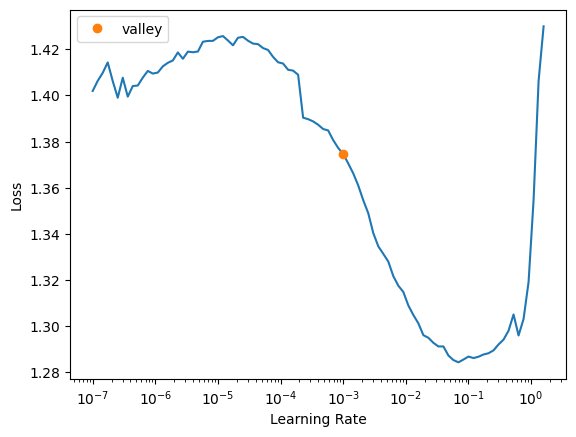

In [ ]:
learn.lr_find()

### Training the model

In [ ]:
learn.fine_tune(5, 1e-2, freeze_epochs=1)

epoch,train_loss,valid_loss,COCOMetric,time
0,0.451844,0.493197,0.274181,00:27


epoch,train_loss,valid_loss,COCOMetric,time
0,0.456779,0.425452,0.400032,00:29
1,0.486476,0.454417,0.275966,00:29
2,0.483637,0.443978,0.298257,00:29
3,0.442751,0.361089,0.366644,00:29
4,0.393939,0.345812,0.397362,00:29


### โหลดภาพ sample มาเทส

In [ ]:
!gdown 'https://drive.google.com/u/1/uc?id=1jS1gNGBRe8en8vYkT_5EPCtwE_xymqYC&export=download' # โหลด tests data
!unzip "/content/maskdetectiontestset" -d "/content/data" # แตกไฟล์

Downloading...
From: https://drive.google.com/u/1/uc?id=1jS1gNGBRe8en8vYkT_5EPCtwE_xymqYC&export=download
To: /content/maskdetectiontestset.zip
100% 115k/115k [00:00<00:00, 85.7MB/s]
Archive:  /content/maskdetectiontestset.zip
replace /content/data/masktestset/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/data/masktestset/1.jpg  
  inflating: /content/data/masktestset/2.jpg  
  inflating: /content/data/masktestset/3.jpg  
  inflating: /content/data/masktestset/4.jpg  


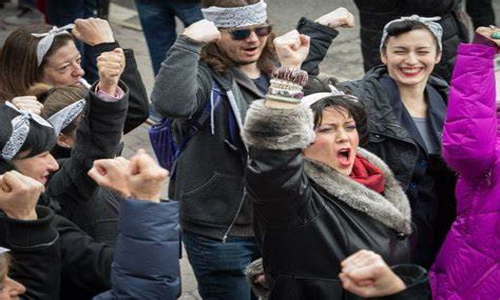

In [ ]:
PIL.Image.open("/content/data/masktestset/1.jpg").resize((500, 300)) # มี files ให้ลอง เปลี่ยนเลข 1 - 4

### รัน Detection โมเดล

ไปเอาของตัวเองมาลองก็ได้นะ

In [ ]:
from icevision.models.inference_sahi import IceSahiModel

In [ ]:
sahimodel = IceSahiModel(model_type=model_type, model=model, class_map=parser.class_map, tfms=valid_tfms, confidence_threshold=0.5) #ลองจูนค่า confidence_threshold ได้

In [ ]:
pred = sahimodel.get_sliced_prediction(
                "/content/data/masktestset/2.jpg",
                keep_sahi_format=False,
                return_img=True,
                slice_height = 128,
                slice_width = 128,
                overlap_height_ratio = 0.2,
                overlap_width_ratio = 0.2,
            )

Performing prediction on 15 number of slices.


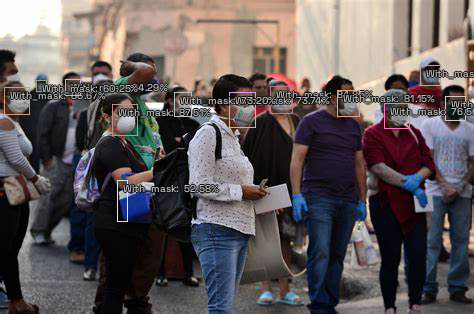

In [ ]:
pred["img"]